In [102]:
import scipy.stats as scs
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import numpy as np
import seaborn as sns

In [52]:

#returns a dataframe with fake CTR data
#N_A & N_B size of the two groups
#p_A & p_B converstion rate of control group and experiment group respectively
def generate_data(N_A, N_B, p_A, p_B, days=None, control_label='A',
                  test_label='B'):
    
     # initiate empty container
    data = []

    # total amount of rows in the data
    N = N_A + N_B

    # distribute events based on proportion of group size
    group_bern = scs.bernoulli(N_A / (N_A + N_B))

    # initiate bernoulli distributions from which to randomly sample
    A_bern = scs.bernoulli(p_A)
    B_bern = scs.bernoulli(p_B)

    for individual in range(N):
        # initite empty row
        row = {}
        # for 'ts' column
        if days is not None:
            if type(days) == int:
                row['ts'] = individual // (N // days)
            else:
                raise ValueError("Provide an integer for the days parameter.")
        # assign group based on 50/50 probability
        row['group'] = group_bern.rvs()

        if row['group'] == 0:
            # assign conversion based on provided parameters
            row['converted'] = A_bern.rvs()
        else:
            row['converted'] = B_bern.rvs()
        # collect row into data container
        data.append(row)

    # convert data into pandas dataframe
    df = pd.DataFrame(data)

    # transform group labels of 0s and 1s to user-defined group labels
    df['group'] = df['group'].apply(
        lambda x: control_label if x == 0 else test_label)

    return df

In [142]:



#What is your practical significance limit ? (desired lift), the change in your metric
#whose signficant result would make you apply/launch the experiment 
d_hat = 0.02

#converstion rate of group A
p_A = 0.10
p_B = 0.12
#conversion rate of group B


#What is the size of your test ? being N the number of individuals in your sample
N_A = 1000
N_B = 1000

In [143]:
#create random data, being 1 --> user converted and 0 user did not convert
ab_data = generate_data(N_A, N_B, p_A, p_B)

#Summarize data, which is the conversion rate for both groups?
ab_data_summary = ab_data.groupby("group").sum()

ab_data_summary["total"] = ab_data.groupby("group").count()["converted"]

ab_data_summary["CR"]= ab_data_summary["converted"]/ab_data_summary["total"]

display(ab_data_summary)

,converted,total,CR
group,,,
A,106,1022,0.103718
B,117,978,0.119632


In [244]:
#remember this "scs.binom.pmf(k=2, n=10, p=0.5)" is read as:
#probability of 2 heads after 10 throws with a probability of head = 0.5

#remember this "binom.cdf(k=5, n=10, p=0.5)" is read as:
#probability of 5 heads or less after 10 throws with a probability of head = 0.5


1.0

In [165]:
#extract data from dataframe
A_group = ab_data[ab_data['group'] == 'A']
B_group = ab_data[ab_data['group'] == 'B']
A_converted, B_converted = A_group['converted'].sum(), B_group['converted'].sum()

A_total, B_total = len(A_group), len(B_group)


p_A, p_B = A_converted / A_total, B_converted / B_total

Text(0, 0.5, 'probability')

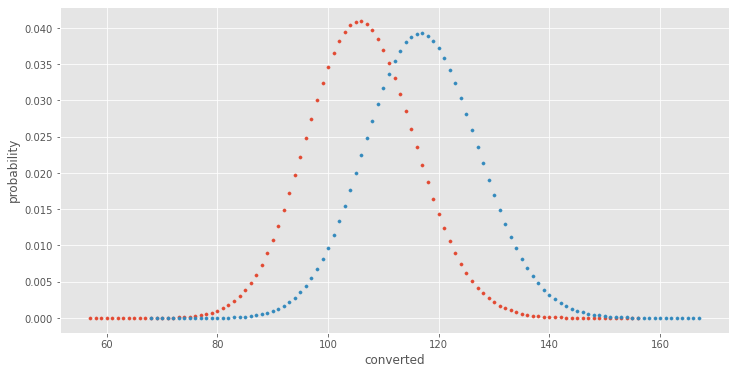

In [166]:
#Plot the test and control group's probability mass functions

fig, ax = plt.subplots(figsize=(12,6))
#np.linspace(1,4,4) returns a np array from 1 until 4 divided into 4. --> 1,2,3,4
xA = np.linspace(A_converted-49, A_converted+50, 100)
#Return a numpy array of the probabilities given a sample size of A_total
#and a probability of p_A, for a range of values xA
#example: what is the probability that of 1 given a probaility p_A and the total of A_total ?
yA = scs.binom(A_total, p_A).pmf(xA)
ax.scatter(xA, yA, s=10)
xB = np.linspace(B_converted-49, B_converted+50, 100)
yB = scs.binom(B_total, p_B).pmf(xB)
ax.scatter(xB, yB, s=10)
plt.xlabel('converted')
plt.ylabel('probability')

In [276]:
scs.bernoulli.var(p_A)

0.09296073467855899

In [277]:
np.sqrt(p_A * (1-p_A)) / np.sqrt(A_total)

0.009537275448111462